In [2]:
import pandas as pd
import matplotlib.pyplot as plt

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
df = pd.read_csv('../data/processed/pipeline_incidents_2010_present_all_CLEAN.csv')
df.head(2)

,datafile_as_of,ff,significant,serious,report_number,supplemental_number,report_received_date,report_type,operator_id,name,...,cause,cause_details,material_involved,material_details,narrative,unintentional_release,installation_year,decade,year_dt,pipeline_age
0,2/28/22,NO,YES,NO,20100001,15047,3/11/10,SUPPLEMENTAL FINAL,15007,PACIFIC GAS & ELECTRIC CO,...,OTHER OUTSIDE FORCE DAMAGE,OTHER OUTSIDE FORCE DAMAGE,OTHER,ALUMINUN,A FIRE AT AN UNOCCUPIED HOME OCCURRED AT APPRO...,10.0,NaN,NaN,NaN,NaN
1,2/28/22,NO,NO,NO,20100002,15553,3/12/10,SUPPLEMENTAL FINAL,13730,NORTHERN INDIANA PUBLIC SERVICE CO,...,EXCAVATION DAMAGE,EXCAVATION DAMAGE BY THIRD PARTY,PLASTIC,NaN,"CONTRACTOR BORING ELECTRIC LINE PARALLEL TO 3""...",310.0,1990-01-01,1990-1999,1990.0,20.0


In [6]:
df['installation_year'] = pd.to_datetime(df['installation_year'], format='%Y-%m-%d')

In [23]:
df_count = df.installation_year.dt.strftime('%Y').value_counts().sort_index().reset_index()
df_count.columns = ['installation_year', 'count']
df_count.head()

,installation_year,count
0,1900,3
1,1901,1
2,1902,1
3,1903,2
4,1906,2


In [12]:
# load in data with total mileage pipelines
df_mileage = pd.read_csv('../data/processed/pipeline-mileage-over-time.csv')

In [26]:
# convert mileage column to str
df_mileage['year'] = df_mileage.year.astype(str)

In [30]:
# merge data
df_merge = df_count.merge(df_mileage, left_on='installation_year', right_on='year', how='left')
df_merge.head()

,installation_year,count,year,Gas Distribution,Gas Transmission and Gathering,Hazardous Liquid,total
0,1900,3,NaN,NaN,NaN,NaN,NaN
1,1901,1,NaN,NaN,NaN,NaN,NaN
2,1902,1,NaN,NaN,NaN,NaN,NaN
3,1903,2,NaN,NaN,NaN,NaN,NaN
4,1906,2,NaN,NaN,NaN,NaN,NaN


In [31]:
# create column with percent of pipelines that have pipeline incidents
df_merge['percent_incidents'] = (df_merge['count'] / df_merge['total'])*100

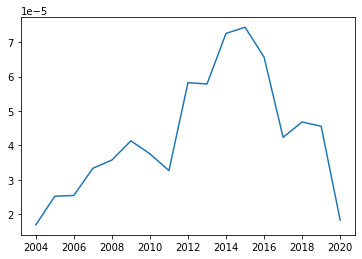

In [32]:
# plot of percent of pipeline mileage that has had an incident each year
plt.plot(df_merge.year, df_merge.percent_incidents)
plt.show()

In [35]:
df_merge.sort_values('percent_incidents', ascending=False).head(10)

,installation_year,count,year,Gas Distribution,Gas Transmission and Gathering,Hazardous Liquid,total,percent_incidents
105,2015,202,2015,2190257.0,318949.0,208622.0,2717828.0,0.000074
104,2014,195,2014,2169375.0,319354.0,199795.0,2688524.0,0.000073
106,2016,180,2016,2211522.0,318218.0,212164.0,2741904.0,0.000066
102,2012,154,2012,2138000.0,319926.0,186221.0,2644147.0,0.000058
103,2013,154,2013,2149819.0,320257.0,192412.0,2662488.0,0.000058
108,2018,130,2018,2238709.0,319542.0,219137.0,2777388.0,0.000047
109,2019,128,2019,2262931.0,320101.0,225001.0,2808033.0,0.000046
107,2017,117,2017,2226053.0,318832.0,216052.0,2760937.0,0.000042
99,2009,107,2009,2086689.0,324936.0,175965.0,2587590.0,0.000041
100,2010,98,2010,2102483.0,324432.0,181986.0,2608901.0,0.000038


In [36]:
df_merge.to_csv('../data/processed/pipeline-incidents-normalized-by-mileage.csv', index=False)